## Loan Prediction Based on Customer Behavior
We need to predict whether a specific customer will default on a loan, given 13 predictor variables.

###  Importing Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("Training Data.csv")

### Inspecting the Dataframe

In [4]:
df.head()

Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  1303834   23           3         single          rented            no   
1   2  7574516   40          10         single          rented            no   
2   3  3991815   66           4        married          rented            no   
3   4  6256451   41           2         single          rented           yes   
4   5  5768871   47          11         single          rented            no   

            Profession                 CITY           STATE  CURRENT_JOB_YRS  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh                3   
1   Software_Developer             Parbhani     Maharashtra                9   
2     Technical_writer            Alappuzha          Kerala                4   
3   Software_Developer          Bhubaneswar          Odisha                2   
4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu                3   

   CURRENT_HOUSE_YRS  Risk_Flag  
0                 13          0  
1                 13          0  
2                 10          0  
3                 12          1  
4                 14          1

### Removing 'Id' column from our analysis, as it does not provide any relevant information for our purposes.

In [5]:
df.drop("Id", axis=1, inplace=True)

In [6]:
df.shape

(252000, 12)

In [7]:
df.describe()

Income            Age     Experience  CURRENT_JOB_YRS  \
count  2.520000e+05  252000.000000  252000.000000    252000.000000   
mean   4.997117e+06      49.954071      10.084437         6.333877   
std    2.878311e+06      17.063855       6.002590         3.647053   
min    1.031000e+04      21.000000       0.000000         0.000000   
25%    2.503015e+06      35.000000       5.000000         3.000000   
50%    5.000694e+06      50.000000      10.000000         6.000000   
75%    7.477502e+06      65.000000      15.000000         9.000000   
max    9.999938e+06      79.000000      20.000000        14.000000   

       CURRENT_HOUSE_YRS      Risk_Flag  
count      252000.000000  252000.000000  
mean           11.997794       0.123000  
std             1.399037       0.328438  
min            10.000000       0.000000  
25%            11.000000       0.000000  
50%            12.000000       0.000000  
75%            13.000000       0.000000  
max            14.000000       1.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB


## Exploratory Data Analysis

### Data Preparation
Checking for Missing value percentage in descending order

In [9]:
missing_val = df.count()/len(df)
missing_val = (1-missing_val)*100
missing_val.sort_values(ascending=False)

Income               0.0
Age                  0.0
Experience           0.0
Married/Single       0.0
House_Ownership      0.0
Car_Ownership        0.0
Profession           0.0
CITY                 0.0
STATE                0.0
CURRENT_JOB_YRS      0.0
CURRENT_HOUSE_YRS    0.0
Risk_Flag            0.0
dtype: float64

### Finding null values

In [10]:
df.isna().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

### Unique values in categorical columns

In [11]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Married/Single',
 'House_Ownership',
 'Car_Ownership',
 'Profession',
 'CITY',
 'STATE']

In [12]:
df['Married/Single'].unique()

array(['single', 'married'], dtype=object)

In [13]:
df['House_Ownership'].unique()

array(['rented', 'norent_noown', 'owned'], dtype=object)

In [14]:
df['Car_Ownership'].unique()

array(['no', 'yes'], dtype=object)

In [15]:
df['Profession'].unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

In [16]:
df['CITY'].unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar',
       'Tiruchirappalli[10]', 'Jalgaon', 'Tiruppur', 'Jamnagar',
       'Kota[6]', 'Karimnagar', 'Hajipur[31]', 'Adoni', 'Erode[17]',
       'Kollam', 'Madurai', 'Anantapuram[24]', 'Kamarhati', 'Bhusawal',
       'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad', 'Ajmer',
       'Ongole', 'Miryalaguda', 'Ambattur', 'Indore', 'Pondicherry',
       'Shimoga', 'Chennai', 'Gulbarga', 'Khammam', 'Saharanpur',
       'Gopalpur', 'Amravati', 'Udupi', 'Howrah', 'Aurangabad[39]',
       'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar', 'Bellary', 'Danapur',
       'Purnia[26]', 'Bijapur', 'Patiala', 'Malda', 'Sagar', 'Durgapur',
       'Junagadh', 'Singrauli', 'Agartala', 'Thanjavur', 'Hindupur',
       'Naihati', 'North_Dumdum', 'Panchkula', 'Anantapur', 'Serampore',
       'Bathinda', 'Nadiad', 'Kanpur', 'Haridwar', 'Berhampur',
       'Jamshedpur', 'Hyderabad', 'Bidar', 'Kottayam', 'Solapur',
       'Suryapet', 'Aizawl', 'Asansol', 'Deoghar'

### The task involves cleaning the text by removing square brackets and any numeric values, as well as replacing occurrences of 'Hubliâ€“Dharwad' with 'Hubli–Dharwad'. The latter is the name of a twin city in the Indian state of Karnataka, formed by the cities of Hubli and Dharwad. The en dash (–) is used to indicate that it is a combination of two distinct but adjacent cities.

In [17]:
import re
def remove_brackets_and_numbers(row):
    return re.sub(r'[\[\]\d]', '', row)

df['CITY'] = df['CITY'].apply(remove_brackets_and_numbers)
df['CITY'].unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar', 'Tiruchirappalli',
       'Jalgaon', 'Tiruppur', 'Jamnagar', 'Kota', 'Karimnagar', 'Hajipur',
       'Adoni', 'Erode', 'Kollam', 'Madurai', 'Anantapuram', 'Kamarhati',
       'Bhusawal', 'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad',
       'Ajmer', 'Ongole', 'Miryalaguda', 'Ambattur', 'Indore',
       'Pondicherry', 'Shimoga', 'Chennai', 'Gulbarga', 'Khammam',
       'Saharanpur', 'Gopalpur', 'Amravati', 'Udupi', 'Howrah',
       'Aurangabad', 'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar',
       'Bellary', 'Danapur', 'Purnia', 'Bijapur', 'Patiala', 'Malda',
       'Sagar', 'Durgapur', 'Junagadh', 'Singrauli', 'Agartala',
       'Thanjavur', 'Hindupur', 'Naihati', 'North_Dumdum', 'Panchkula',
       'Anantapur', 'Serampore', 'Bathinda', 'Nadiad', 'Kanpur',
       'Haridwar', 'Berhampur', 'Jamshedpur', 'Hyderabad', 'Bidar',
       'Kottayam', 'Solapur', 'Suryapet', 'Aizawl', 'Asansol', 'Deoghar',
       'Eluru', 'Ulhasnagar', 'A

In [18]:
df['CITY'] = df['CITY'].replace('Hubliâ€“Dharwad', 'Hubli–Dharwad')
df['CITY'].unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar', 'Tiruchirappalli',
       'Jalgaon', 'Tiruppur', 'Jamnagar', 'Kota', 'Karimnagar', 'Hajipur',
       'Adoni', 'Erode', 'Kollam', 'Madurai', 'Anantapuram', 'Kamarhati',
       'Bhusawal', 'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad',
       'Ajmer', 'Ongole', 'Miryalaguda', 'Ambattur', 'Indore',
       'Pondicherry', 'Shimoga', 'Chennai', 'Gulbarga', 'Khammam',
       'Saharanpur', 'Gopalpur', 'Amravati', 'Udupi', 'Howrah',
       'Aurangabad', 'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar',
       'Bellary', 'Danapur', 'Purnia', 'Bijapur', 'Patiala', 'Malda',
       'Sagar', 'Durgapur', 'Junagadh', 'Singrauli', 'Agartala',
       'Thanjavur', 'Hindupur', 'Naihati', 'North_Dumdum', 'Panchkula',
       'Anantapur', 'Serampore', 'Bathinda', 'Nadiad', 'Kanpur',
       'Haridwar', 'Berhampur', 'Jamshedpur', 'Hyderabad', 'Bidar',
       'Kottayam', 'Solapur', 'Suryapet', 'Aizawl', 'Asansol', 'Deoghar',
       'Eluru', 'Ulhasnagar', 'A

In [19]:
df['STATE'].unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

### Replacing the redundant occurrence of 'Uttar_Pradesh[5]' with 'Uttar_Pradesh'

In [20]:
df['STATE'] = df['STATE'].replace('Uttar_Pradesh[5]', 'Uttar_Pradesh')

In [21]:
df['STATE'].unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Manipur', 'Sikkim'], dtype=object)

### Box Plot of all Continuous columns to see data distribution

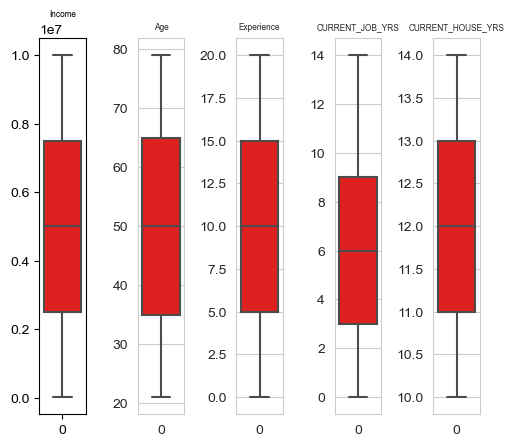

In [22]:
l = [col for col in df.columns.values if col not in categorical_cols]
l.remove('Risk_Flag')
number_of_columns = 5
number_of_rows = len(l) - 1 // number_of_columns
plt.figure(figsize=(number_of_columns, 5 * number_of_rows))

for i in range(0, len(l)):
    plt.subplot(number_of_rows + 1, number_of_columns, i + 1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]], color='red', orient='v')
    plt.title(l[i], fontsize=6)
    plt.tight_layout()

### Ratio of data imbalance

In [23]:
(df['Risk_Flag']==0).sum()/(df['Risk_Flag']==1).sum()

7.130081300813008

### Exploring the relationship between the target variable 'Risk_flag' and categorical columns through plotting to uncover potential insights.

In [24]:
df_0 = df.loc[df['Risk_Flag']==0]
df_1 = df.loc[df['Risk_Flag']==1]

In [25]:
def univariate(column, hue):
    col = column
    hue = hue
    fig = plt.figure(figsize=(13,10))

    ax1 = plt.subplot(221)
    df[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)

    ax2 = plt.subplot(222)
    df1 = pd.DataFrame()
    df1['0']= ((df_0[col].value_counts())/len(df_0))
    df1['1']= ((df_1[col].value_counts())/len(df_1))
    df1.plot.bar(ax=ax2)
    plt.title('Plotting data for Risk_Flag in terms of total count')
    
    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

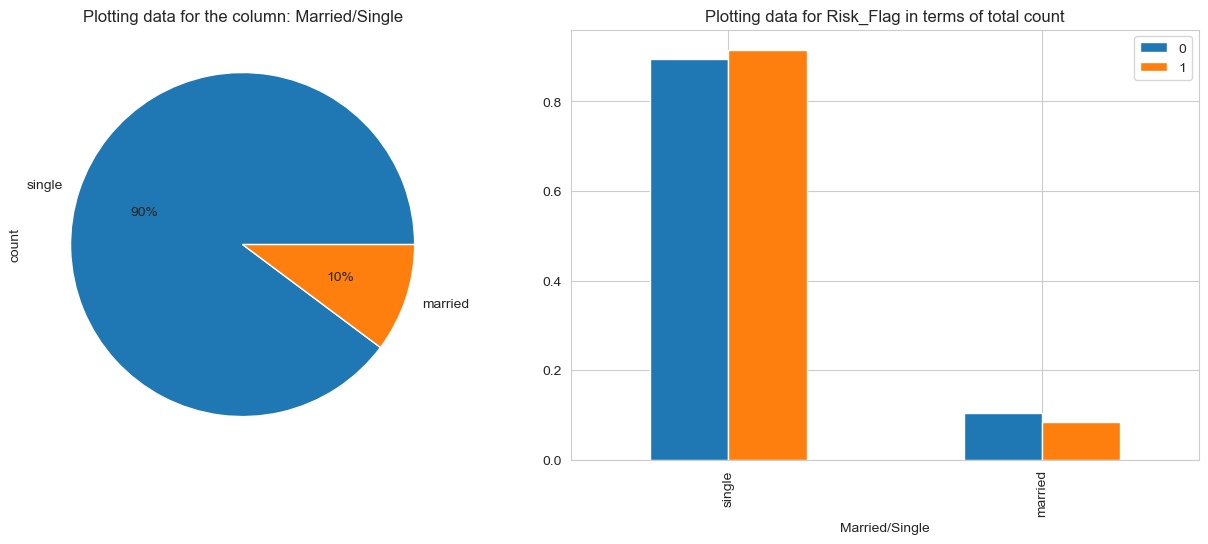

In [26]:
univariate('Married/Single', 'Risk_Flag')

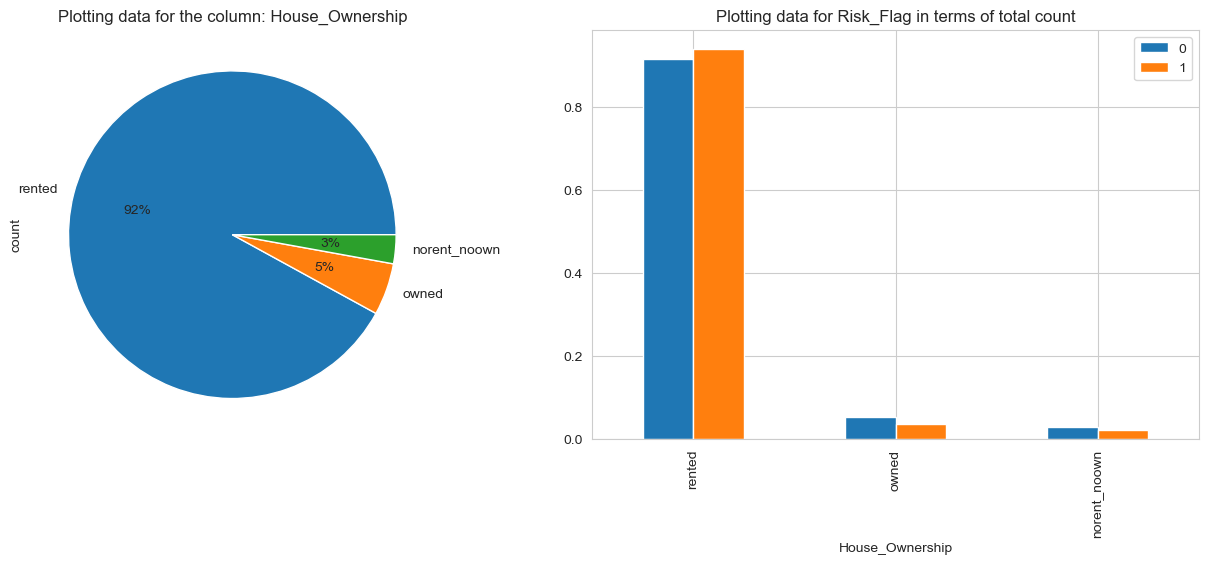

In [27]:
univariate('House_Ownership', 'Risk_Flag')

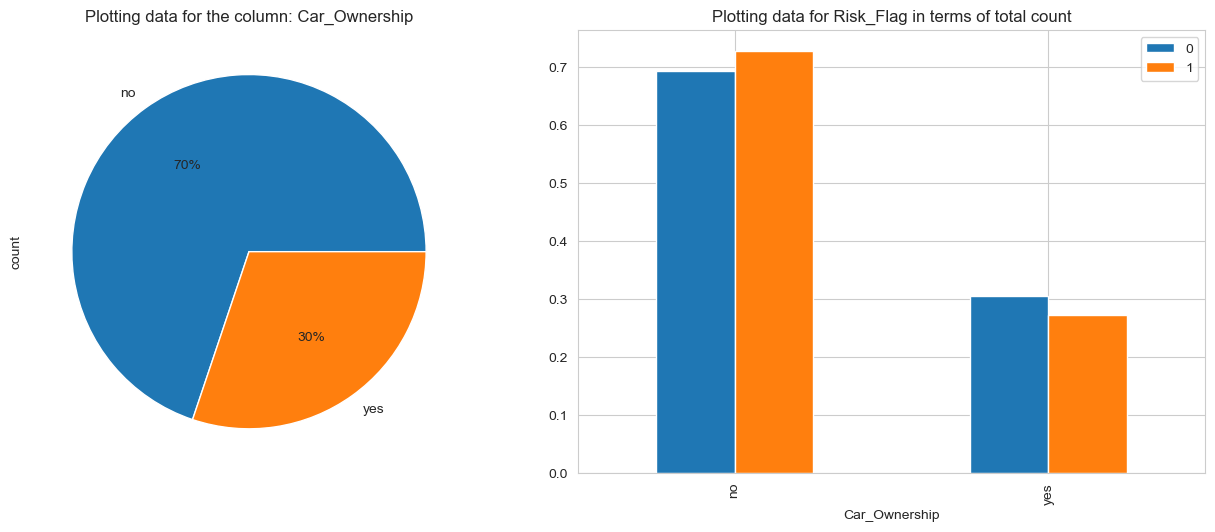

In [28]:
univariate('Car_Ownership', 'Risk_Flag')

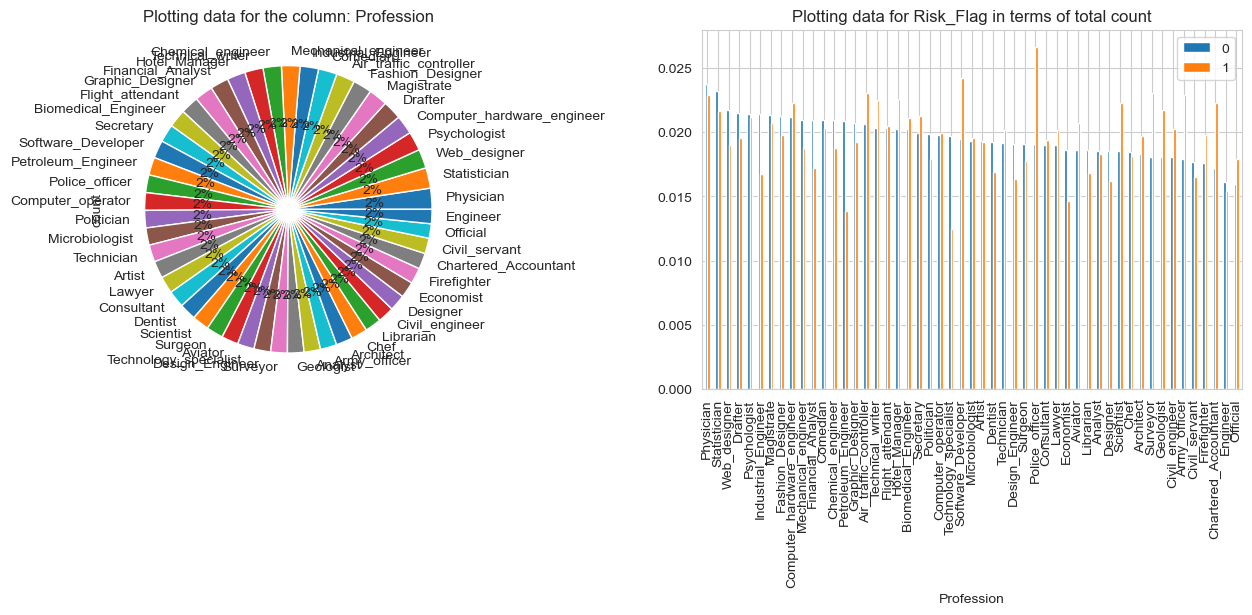

In [29]:
univariate('Profession', 'Risk_Flag')

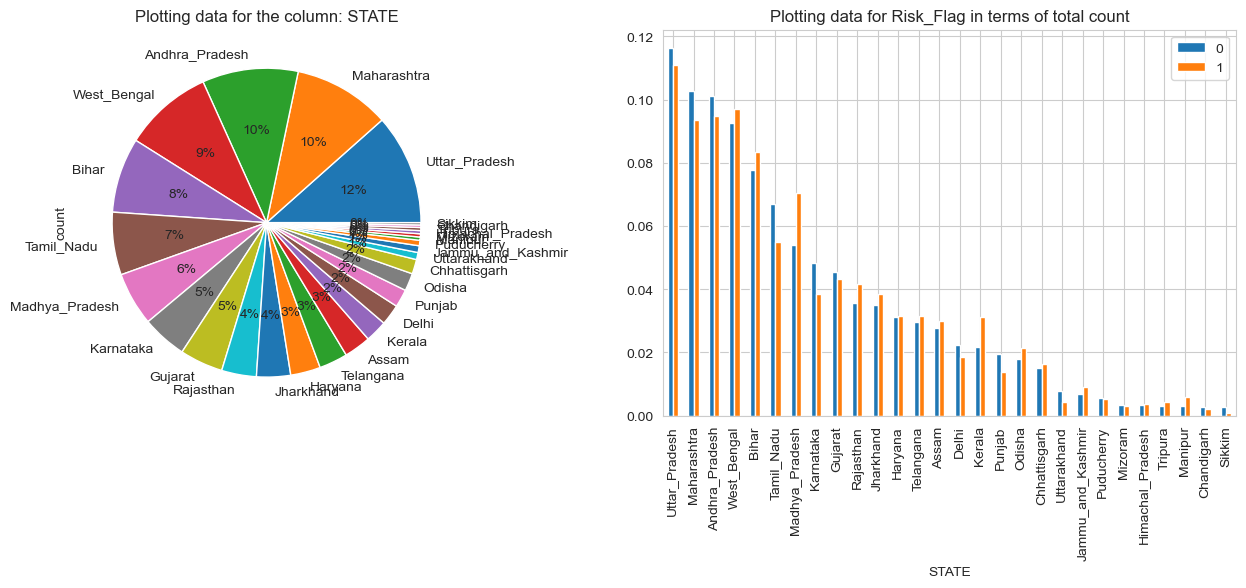

In [30]:
univariate('STATE', 'Risk_Flag')

In [31]:
numerical_col = df.select_dtypes(include=['int64', 'float64']).columns
numerical_col

Index(['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS',
       'Risk_Flag'],
      dtype='object')

### Finding the correlation between all continuous variables.

<Axes: >

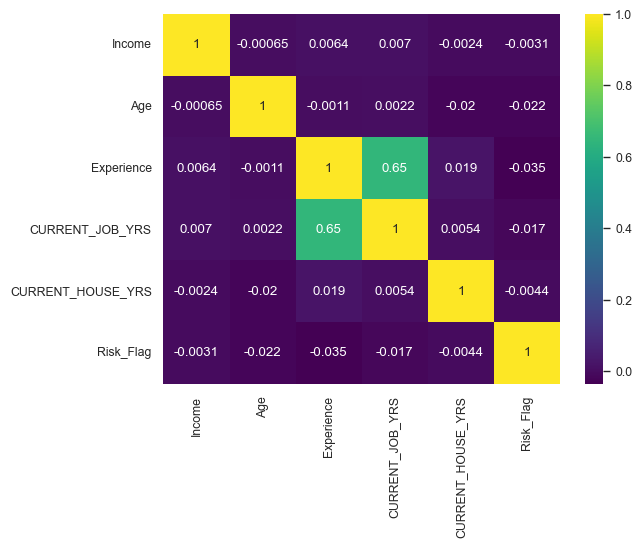

In [32]:
sns.set_context("paper", font_scale=1)
sns.heatmap(df[numerical_col].corr(), annot=True, cmap = 'viridis')

### Finding top correlation

In [33]:
top_corr = df[numerical_col].corr().abs()
top_corr = top_corr.unstack().sort_values(kind="quicksort")
top_corr = top_corr.dropna()
top_corr = top_corr[top_corr != 1.0]
print(top_corr)

Income             Age                  0.000652
Age                Income               0.000652
                   Experience           0.001118
Experience         Age                  0.001118
CURRENT_JOB_YRS    Age                  0.002154
Age                CURRENT_JOB_YRS      0.002154
Income             CURRENT_HOUSE_YRS    0.002397
CURRENT_HOUSE_YRS  Income               0.002397
Income             Risk_Flag            0.003091
Risk_Flag          Income               0.003091
CURRENT_HOUSE_YRS  Risk_Flag            0.004375
Risk_Flag          CURRENT_HOUSE_YRS    0.004375
CURRENT_JOB_YRS    CURRENT_HOUSE_YRS    0.005372
CURRENT_HOUSE_YRS  CURRENT_JOB_YRS      0.005372
Experience         Income               0.006422
Income             Experience           0.006422
CURRENT_JOB_YRS    Income               0.007045
Income             CURRENT_JOB_YRS      0.007045
Risk_Flag          CURRENT_JOB_YRS      0.016942
CURRENT_JOB_YRS    Risk_Flag            0.016942
Experience         C

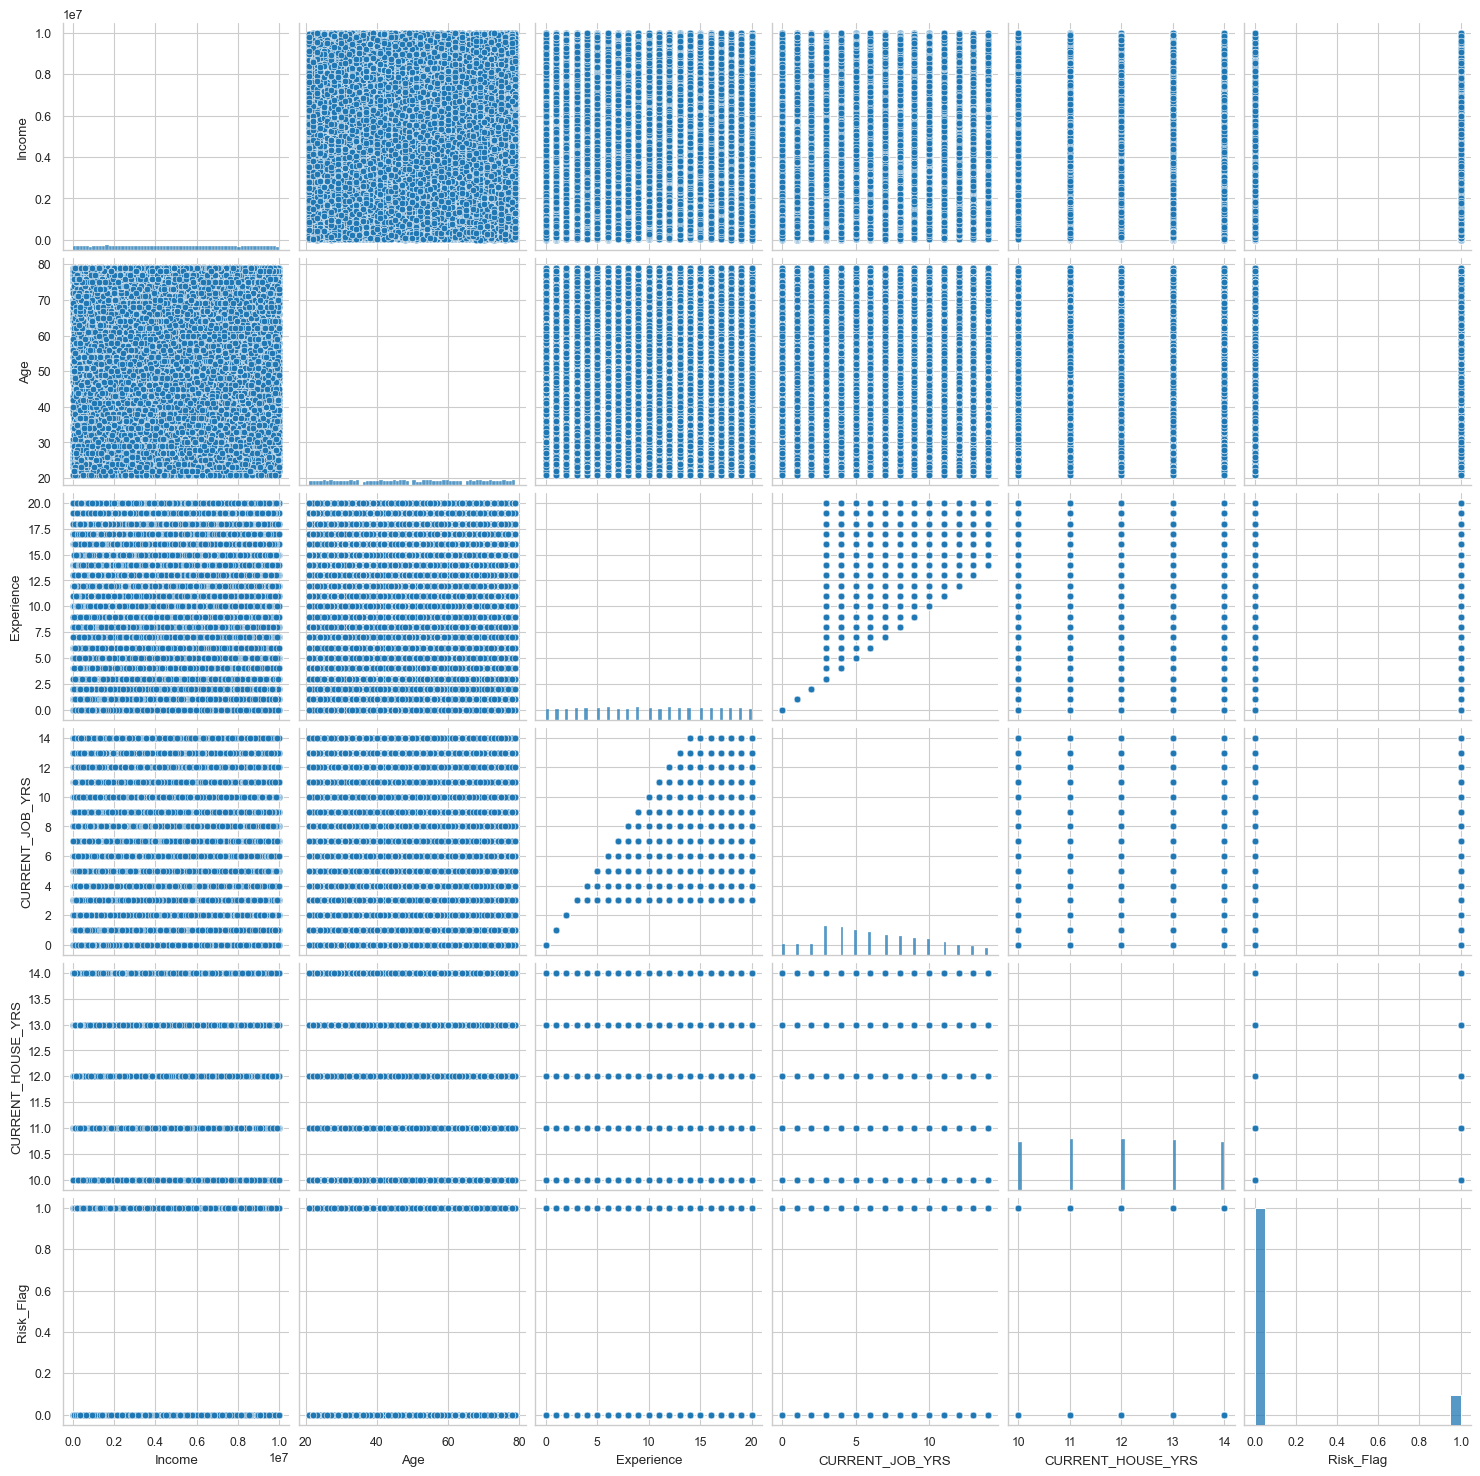

In [34]:
sns.pairplot(df)

### Test-Train Split

In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [36]:
from sklearn.model_selection import train_test_split
X = df.drop('Risk_Flag',axis=1)
y = df['Risk_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((176400, 11), (75600, 11))

### Logistic Regression

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_lg = scaler.fit_transform(X)
X_lg_train, X_lg_test, y_lg_train, y_lg_test = train_test_split(X_lg, y, train_size=0.7, random_state=42)

In [38]:
%%time
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_lg_train, y_lg_train)
acc_log = round(logreg.score(X_lg_train, y_lg_train), 3)
log = round(logreg.score(X_lg_test, y_lg_test), 3)
print("Train: ", acc_log)
print("Test: ", log)

Train:  0.877
Test:  0.877
CPU times: total: 1.45 s
Wall time: 498 ms


### Decision Tree without Hyper-parameter tuning

In [39]:
%%time
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

CPU times: total: 3.53 s
Wall time: 3.22 s


DecisionTreeClassifier(random_state=42)

CPU times: total: 52.9 s
Wall time: 55.3 s


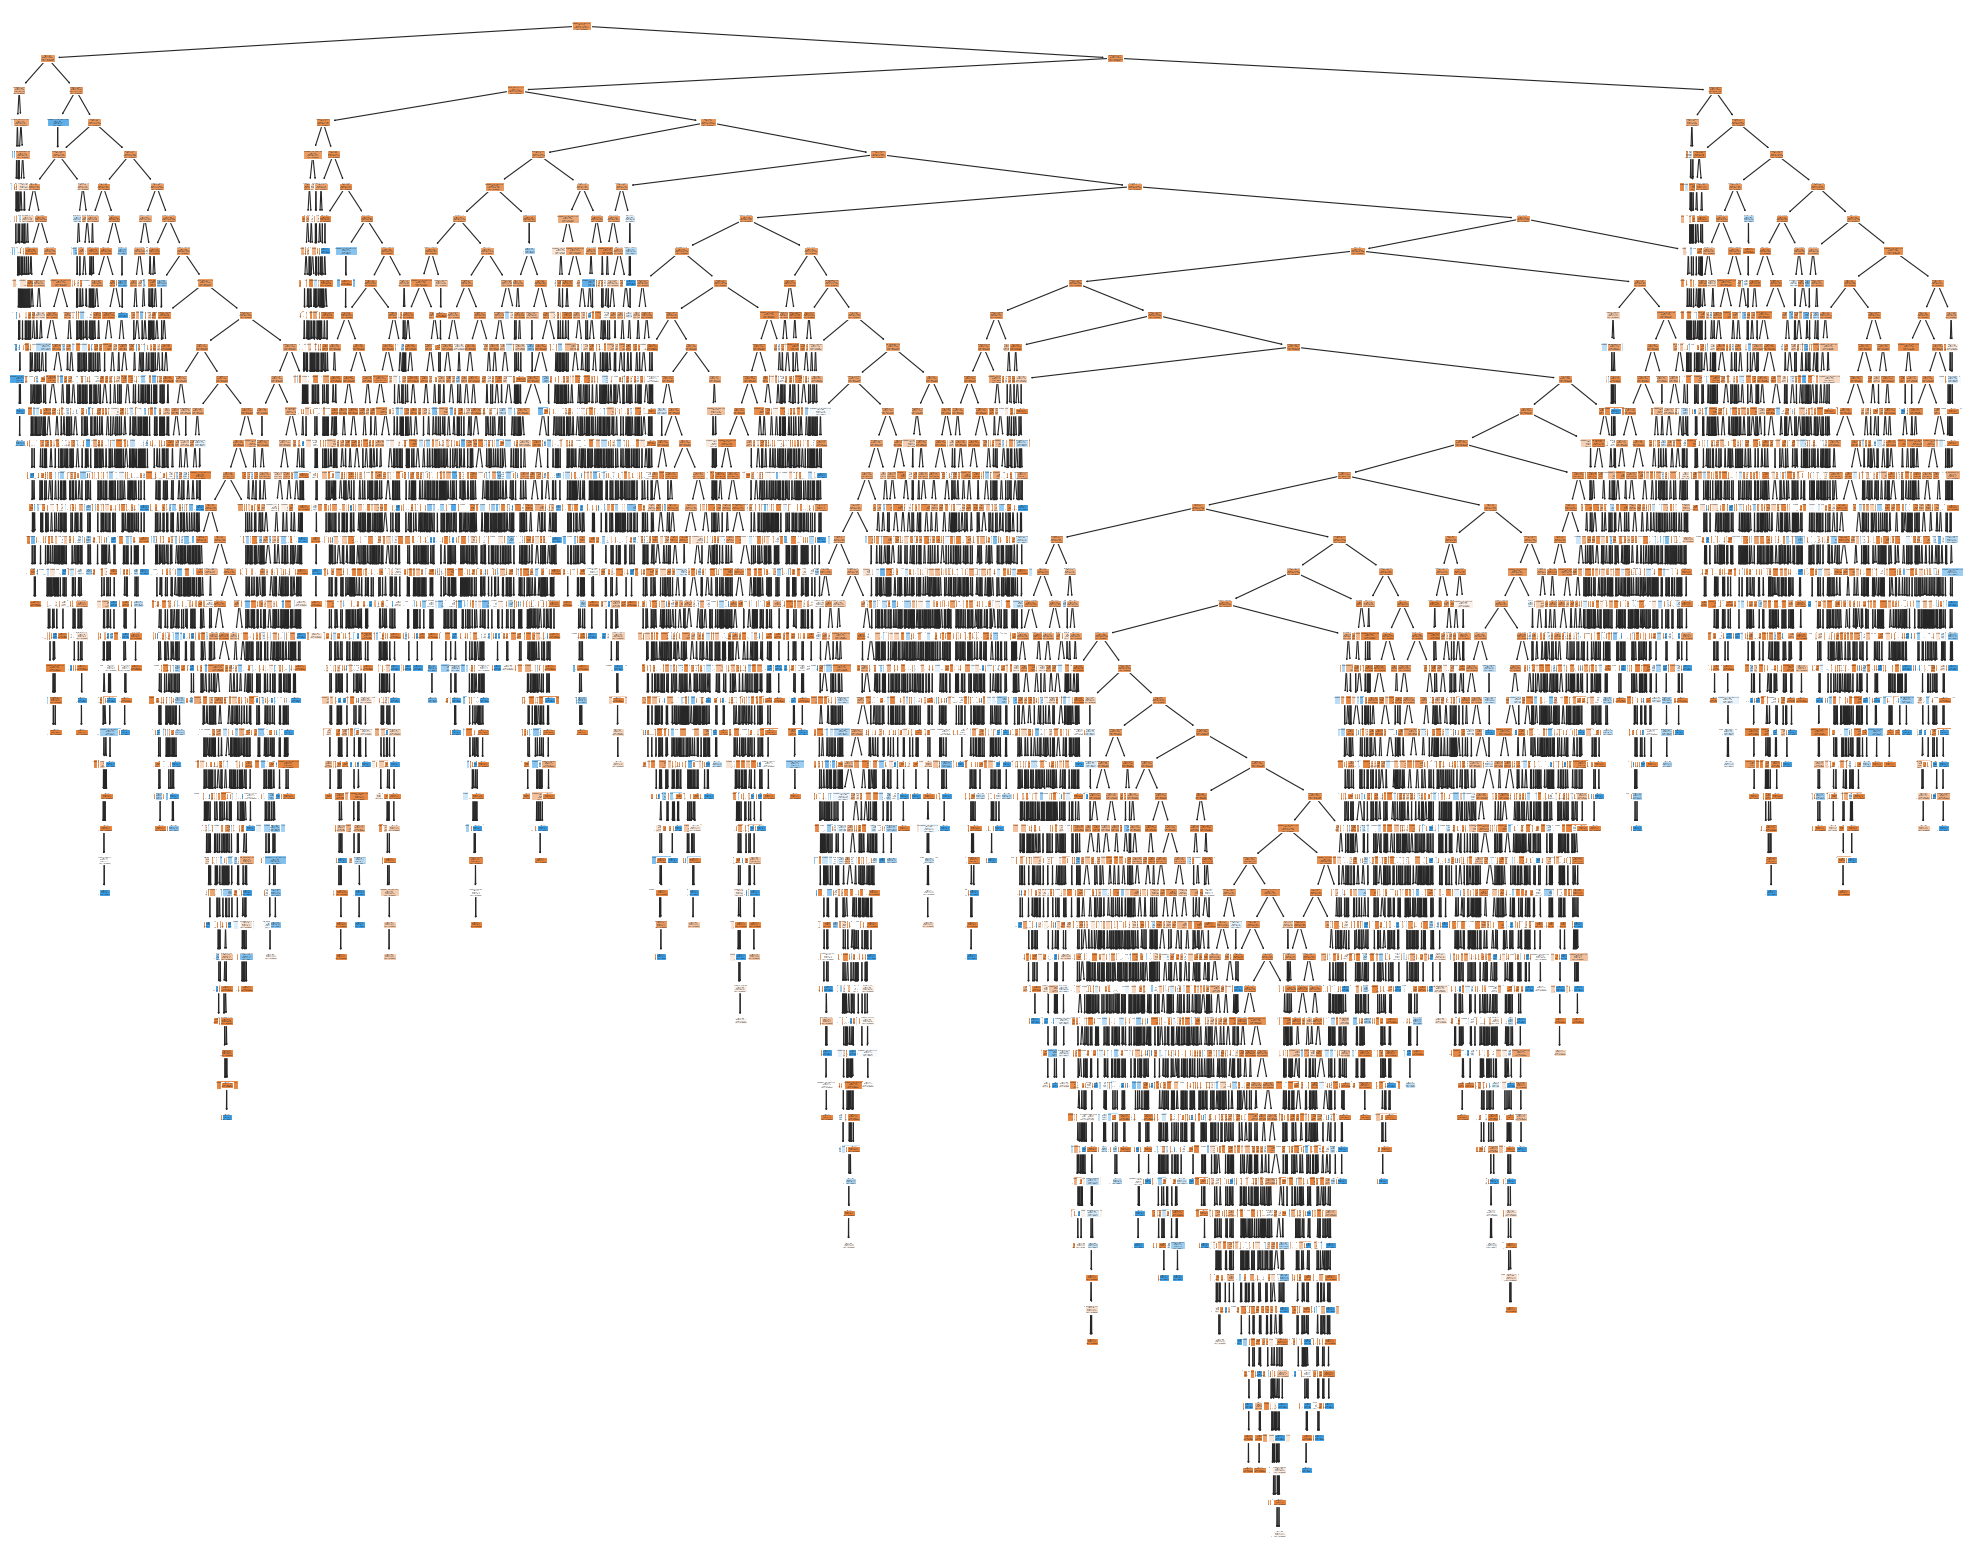

In [40]:
%%time
from sklearn import datasets,tree
text_representation = tree.export_text(dt)
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership', 'Car_Ownership',
       'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'],  
                   class_names=['No Default', 'Default'],
                   filled=True)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [42]:
print("Train: ",accuracy_score(y_train,dt.predict(X_train)))
confusion_matrix(y_train,dt.predict(X_train))

Train:  0.937358276643991


array([[148115,   6560],
       [  4490,  17235]], dtype=int64)

In [43]:
print("Test: ",accuracy_score(y_test,dt.predict(X_test)))
confusion_matrix(y_test,dt.predict(X_test))

Test:  0.8817460317460317


array([[61267,  5062],
       [ 3878,  5393]], dtype=int64)

### Decision tree with Hyper-parameter tuning using GridsearchCV and entropy

In [44]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["entropy"]
}
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [45]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits
CPU times: total: 3.42 s
Wall time: 13.3 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [46]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10,
                       random_state=42)

CPU times: total: 6.33 s
Wall time: 6.33 s


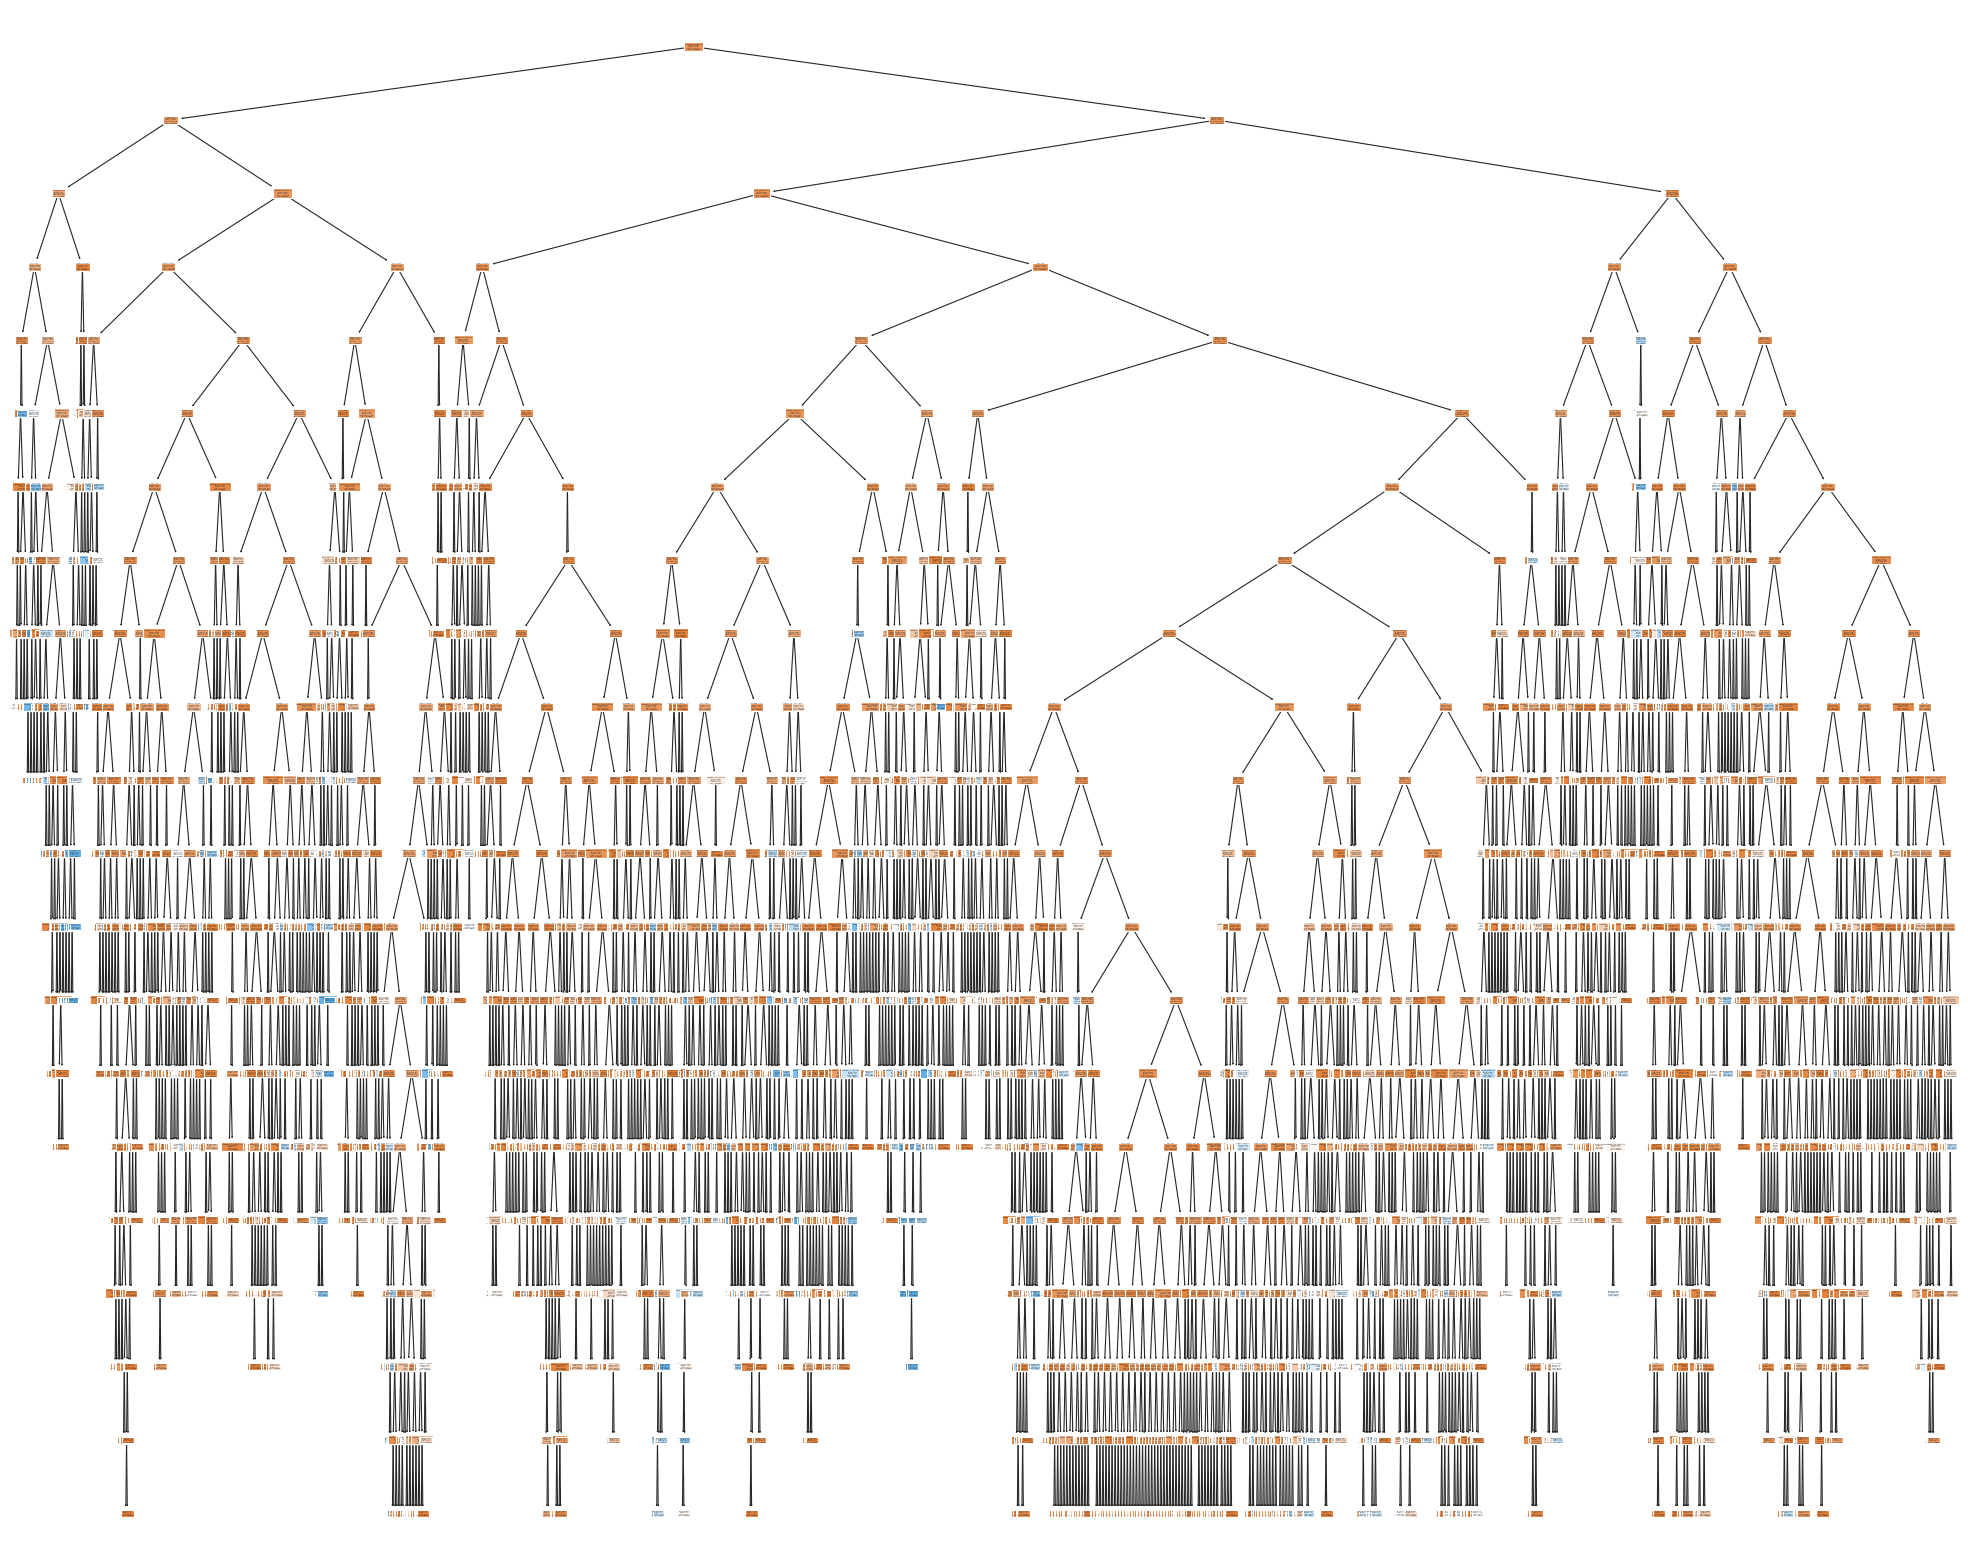

In [47]:
%%time
text_representation = tree.export_text(dt_best)
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_best, 
                   feature_names=['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership', 'Car_Ownership',
       'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'],  
                   class_names=['No Default', 'Default'],
                   filled=True)

In [48]:
dt_best=grid_search.best_estimator_
print(grid_search.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10,
                       random_state=42)


In [49]:
print("Train: ",accuracy_score(y_train,dt_best.predict(X_train)))
confusion_matrix(y_train,dt.predict(X_train))

Train:  0.8998356009070295


array([[148115,   6560],
       [  4490,  17235]], dtype=int64)

In [50]:
print("Test: ",accuracy_score(y_test,dt_best.predict(X_test)))
confusion_matrix(y_test,dt.predict(X_test))

Test:  0.8908862433862433


array([[61267,  5062],
       [ 3878,  5393]], dtype=int64)

### Variable importance in Decision Tree

In [52]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": dt_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
7                CITY  0.200730
0              Income  0.198620
6          Profession  0.146074
1                 Age  0.130893
8               STATE  0.104072
10  CURRENT_HOUSE_YRS  0.067918
9     CURRENT_JOB_YRS  0.065950
2          Experience  0.049474
5       Car_Ownership  0.021374
4     House_Ownership  0.009195
3      Married/Single  0.005700

### RandomForest without Hyper-parameter tuning

In [53]:
%%time
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42,oob_score=True)
rf.fit(X, y)

CPU times: total: 38.4 s
Wall time: 38.5 s


RandomForestClassifier(oob_score=True, random_state=42)

In [54]:
print("Accuracy: ",rf.oob_score_)
print()

Accuracy:  0.8979166666666667



In [55]:
confusion_matrix(y,rf.predict(X))

array([[211504,   9500],
       [  6754,  24242]], dtype=int64)

### RandomForest with Hyper-parameter tuning

In [56]:
params = {
    'max_depth': [40, 45],
    'min_samples_leaf': [5, 10],
    'max_features': [6, 7, 8],
    'n_estimators': [50, 55]
}
grid_search = GridSearchCV(estimator=rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [57]:
%%time
grid_search.fit(X,y)

Fitting 4 folds for each of 24 candidates, totalling 96 fits
CPU times: total: 32.8 s
Wall time: 13min 2s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [40, 45], 'max_features': [6, 7, 8],
                         'min_samples_leaf': [5, 10],
                         'n_estimators': [50, 55]},
             scoring='accuracy', verbose=1)

In [58]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=40, max_features=6, min_samples_leaf=5,
                       n_estimators=50, oob_score=True, random_state=42)

In [59]:
%%time
rf_best.fit(X, y)

CPU times: total: 31.3 s
Wall time: 31.4 s


RandomForestClassifier(max_depth=40, max_features=6, min_samples_leaf=5,
                       n_estimators=50, oob_score=True, random_state=42)

In [60]:
print("Accuracy: ",rf_best.oob_score_)

Accuracy:  0.8992222222222223


In [61]:
confusion_matrix(y,rf_best.predict(X))

array([[212184,   8820],
       [ 14671,  16325]], dtype=int64)

### Variable importance in RandomForest

In [62]:
imp_df = pd.DataFrame({
    "Varname": X.columns,
    "Imp": rf_best.feature_importances_
})

In [63]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
0              Income  0.210992
7                CITY  0.174395
6          Profession  0.143545
1                 Age  0.139416
8               STATE  0.098399
2          Experience  0.072914
9     CURRENT_JOB_YRS  0.067852
10  CURRENT_HOUSE_YRS  0.060451
5       Car_Ownership  0.013515
3      Married/Single  0.009893
4     House_Ownership  0.008628

### XGBoost

In [64]:
%%time
import xgboost as xgb
from sklearn import metrics
xgclf = xgb.XGBClassifier()
xgclf.fit(X_train, y_train)

CPU times: total: 6.78 s
Wall time: 2.48 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [65]:
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=xgclf.predict_proba(X_train)[:, 1]))

AUC on train data by XGBoost = 0.9233931311858284


In [66]:
confusion_matrix(y_train,xgclf.predict(X_train))

array([[152189,   2486],
       [ 15708,   6017]], dtype=int64)

In [67]:
print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=xgclf.predict_proba(X_test)[:, 1]))

AUC on test data by XGBoost = 0.8872729811290866


In [68]:
confusion_matrix(y_test,xgclf.predict(X_test))

array([[64991,  1338],
       [ 7026,  2245]], dtype=int64)

### XGBoost with Hyper-parameter tuning

In [69]:
%%time
from sklearn import model_selection
xgb_model = xgb.XGBClassifier()
parameters = {'learning_rate': [0.3, 0.4, 0.5],
              'max_depth': [16, 20],
              'min_child_weight': [6, 7, 8],
              'n_estimators': [150, 200]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(X_train, y_train)

CPU times: total: 36.2 s
Wall time: 3min 14s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.4, 0.5],
                         'max_depth': [16, 20], 'min_child_weight': [6, 7, 8],
                         'n_estimators': [150, 200]},
             scoring=make_scorer(roc_auc_score, needs_proba=True))

In [70]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 20, 'min_child_weight': 6, 'n_estimators': 200}
0.9263847111655744
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [71]:
%%time
final_model = clf_xgb.best_estimator_
final_model.fit(X_train, y_train)
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=final_model.predict_proba(X_train)[:, 1]))
print(confusion_matrix(y_train,clf_xgb.predict(X_train)))
print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=final_model.predict_proba(X_test)[:, 1]))
print(confusion_matrix(y_test,clf_xgb.predict(X_test)))

AUC on train data by XGBoost = 0.9785979826664284
[[147821   6854]
 [  4196  17529]]
AUC on test data by XGBoost = 0.9310942487608702
[[62779  3550]
 [ 4184  5087]]
CPU times: total: 47 s
Wall time: 6.58 s


In [72]:
import joblib
joblib.dump(final_model, 'model.joblib')

['model.joblib']